In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from collections import Counter
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC


#E1_POSITIVE = "https://raw.githubusercontent.com/chaitalikalra/JCV-dataset/master/e1%20positive.csv"

E1_POSITIVE ="Heart_all_features.csv"


C:\Users\avisa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\avisa\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Read csv file to data set e1_df
e1_df = pd.read_csv(E1_POSITIVE)

In [3]:
# print first 5 rows of data set to make sure data loaded correctly
e1_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# returns number of rows and columns
print(e1_df.shape) 
# shows diferent values of 'target' and the count. There are 458 'B' and 241 'M'
print(Counter(e1_df['target']))


(303, 14)
Counter({1: 165, 0: 138})


In [5]:
# drop specified label from rows or columns
# (labels, axis=0 is equivalent to index=labels).  (labels, axis=1 is equivalent to columns=labels).
X_data = e1_df.drop('target', axis=1)
X_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [6]:
y_data = e1_df['target']
# test_size represent the proportion of the dataset to include in the test split. shuffle Whether or not to shuffle the data before splitting.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.34, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199, 13)
(104, 13)
(199,)
(104,)


In [7]:
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 103, 0: 96})
Counter({1: 62, 0: 42})


In [8]:
# n_estimator The number of trees in the forest.
# max_features is mtry. 'auto'=sqrt(features) int= we set the mtry
clf = RandomForestClassifier(n_estimators=1000,max_features=3)
# cv Determines the cross-validation splitting strategy. cv=none use the default=5. 
#scores = cross_val_score(clf, X_train, y_train, cv=3)
scores = cross_val_score(clf, X_train, y_train, cv=5)



In [9]:

# score Array of scores of the estimator for each run of the cross validation.F1 score
print(scores)
print(np.mean(scores))

[0.85       0.725      0.85       0.8        0.87179487]
0.8193589743589744


In [10]:
#Train the Random Forest with training dataset
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
print(X_test.columns)
#Return the feature importances (the higher, the more important the features
print(clf.feature_importances_)

0.8173076923076923
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
[0.09632009 0.0298264  0.1464744  0.07300367 0.08056897 0.00899687
 0.01677427 0.15167116 0.05081742 0.12415851 0.03689656 0.09929589
 0.08519577]


In [12]:
#svc = SVC().fit(X_train, y_train)
perm = PermutationImportance(clf,random_state = 1).fit(X_test, y_test)
eli5.show_weights(perm)


 


Weight,Feature
0.0558 ± 0.0308,x2
0.0538 ± 0.0288,x1
0.0462 ± 0.0373,x12
0.0404 ± 0.0144,x9
0.0365 ± 0.0224,x8
0.0269 ± 0.0255,x10
0.0212 ± 0.0308,x11
0.0135 ± 0.0357,x7
0.0115 ± 0.0331,x0
0.0096 ± 0.0122,x6


In [13]:
columns = ['cp','sex', 'target']
dfe2 = pd.DataFrame(e1_df, columns=columns)

n2_samples,n2_features = dfe2.shape
print("Sample Size", n2_samples)


X2 = dfe2.drop("target", axis = 1)
Y2 = dfe2["target"]
print("Sample data with top 2 features \n \n" , X2.head)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3, shuffle = True)
model2 = RandomForestClassifier(n_estimators = 1000, max_features = 1, bootstrap = True, oob_score = True)
model2.fit(X2_train, y2_train)

scores2 = cross_val_score(model2, X2_train, y2_train, cv=4)
print(scores2)
print(np.mean(scores2))

Sample Size 303
Sample data with top 2 features 
 
 <bound method NDFrame.head of      cp  sex
0     3    1
1     2    1
2     1    0
3     1    1
4     0    0
..   ..  ...
298   0    0
299   3    1
300   0    1
301   0    1
302   1    0

[303 rows x 2 columns]>
[0.81132075 0.73584906 0.77358491 0.75471698]
0.7688679245283019


In [14]:
columns = ['cp','sex', 'thal', 'target']
dfe3 = pd.DataFrame(e1_df, columns=columns)

n2_samples,n2_features = dfe3.shape
print("Sample Size", n2_samples)


X2 = dfe3.drop("target", axis = 1)
Y2 = dfe3["target"]
print("Sample data with top 2 features \n \n" , X2.head)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3, shuffle = True)
model3 = RandomForestClassifier(n_estimators = 1000, max_features = 2, bootstrap = True, oob_score = True)
model3.fit(X2_train, y2_train)

scores3 = cross_val_score(model2, X2_train, y2_train, cv=4)
print(scores3)
print(np.mean(scores3))

Sample Size 303
Sample data with top 2 features 
 
 <bound method NDFrame.head of      cp  sex  thal
0     3    1     1
1     2    1     2
2     1    0     2
3     1    1     2
4     0    0     2
..   ..  ...   ...
298   0    0     3
299   3    1     3
300   0    1     3
301   0    1     3
302   1    0     2

[303 rows x 3 columns]>
[0.77358491 0.83018868 0.71698113 0.75471698]
0.7688679245283019


In [15]:
columns = ['cp','sex', 'thal', 'oldpeak', 'target']
dfe4 = pd.DataFrame(e1_df, columns=columns)

n2_samples,n2_features = dfe4.shape
print("Sample Size", n2_samples)


X2 = dfe4.drop("target", axis = 1)
Y2 = dfe4["target"]
print("Sample data with top 2 features \n \n" , X2.head)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3, shuffle = True)
model4 = RandomForestClassifier(n_estimators = 1000, max_features = 2, bootstrap = True, oob_score = True)
model4.fit(X2_train, y2_train)

scores4 = cross_val_score(model2, X2_train, y2_train, cv=4)
print(scores4)
print(np.mean(scores4))

Sample Size 303
Sample data with top 2 features 
 
 <bound method NDFrame.head of      cp  sex  thal  oldpeak
0     3    1     1      2.3
1     2    1     2      3.5
2     1    0     2      1.4
3     1    1     2      0.8
4     0    0     2      0.6
..   ..  ...   ...      ...
298   0    0     3      0.2
299   3    1     3      1.2
300   0    1     3      3.4
301   0    1     3      1.2
302   1    0     2      0.0

[303 rows x 4 columns]>
[0.79245283 0.83018868 0.71698113 0.77358491]
0.7783018867924528


In [16]:
columns = ['cp','sex', 'thal', 'oldpeak','exang', 'target']
dfe5 = pd.DataFrame(e1_df, columns=columns)

n2_samples,n2_features = dfe5.shape
print("Sample Size", n2_samples)


X2 = dfe5.drop("target", axis = 1)
Y2 = dfe5["target"]
print("Sample data with top 2 features \n \n" , X2.head)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3, shuffle = True)
model5 = RandomForestClassifier(n_estimators = 1000, max_features = 2, bootstrap = True, oob_score = True)
model5.fit(X2_train, y2_train)

scores5 = cross_val_score(model2, X2_train, y2_train, cv=4)
print(scores5)
print(np.mean(scores5))

Sample Size 303
Sample data with top 2 features 
 
 <bound method NDFrame.head of      cp  sex  thal  oldpeak  exang
0     3    1     1      2.3      0
1     2    1     2      3.5      0
2     1    0     2      1.4      0
3     1    1     2      0.8      0
4     0    0     2      0.6      1
..   ..  ...   ...      ...    ...
298   0    0     3      0.2      1
299   3    1     3      1.2      0
300   0    1     3      3.4      0
301   0    1     3      1.2      1
302   1    0     2      0.0      0

[303 rows x 5 columns]>
[0.71698113 0.77358491 0.73584906 0.79245283]
0.7547169811320755


In [17]:
columns = ['cp','sex', 'thal', 'oldpeak','exang','slope', 'target']
dfe6 = pd.DataFrame(e1_df, columns=columns)

n2_samples,n2_features = dfe6.shape
print("Sample Size", n2_samples)


X2 = dfe6.drop("target", axis = 1)
Y2 = dfe6["target"]
print("Sample data with top 2 features \n \n" , X2.head)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3, shuffle = True)
model6 = RandomForestClassifier(n_estimators = 1000, max_features = 2, bootstrap = True, oob_score = True)
model6.fit(X2_train, y2_train)

scores6 = cross_val_score(model2, X2_train, y2_train, cv=4)
print(scores6)
print(np.mean(scores6))

Sample Size 303
Sample data with top 2 features 
 
 <bound method NDFrame.head of      cp  sex  thal  oldpeak  exang  slope
0     3    1     1      2.3      0      0
1     2    1     2      3.5      0      0
2     1    0     2      1.4      0      2
3     1    1     2      0.8      0      2
4     0    0     2      0.6      1      2
..   ..  ...   ...      ...    ...    ...
298   0    0     3      0.2      1      1
299   3    1     3      1.2      0      1
300   0    1     3      3.4      0      1
301   0    1     3      1.2      1      1
302   1    0     2      0.0      0      1

[303 rows x 6 columns]>
[0.73584906 0.79245283 0.73584906 0.79245283]
0.7641509433962264


In [18]:
columns = ['cp','sex', 'thal', 'oldpeak','exang','slope','ca','target']
dfe7 = pd.DataFrame(e1_df, columns=columns)

n2_samples,n2_features = dfe7.shape
print("Sample Size", n2_samples)


X2 = dfe7.drop("target", axis = 1)
Y2 = dfe7["target"]
print("Sample data with top 2 features \n \n" , X2.head)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3, shuffle = True)
model7 = RandomForestClassifier(n_estimators = 1000, max_features = 2, bootstrap = True, oob_score = True)
model7.fit(X2_train, y2_train)

scores7 = cross_val_score(model2, X2_train, y2_train, cv=4)
print(scores7)
print(np.mean(scores7))

Sample Size 303
Sample data with top 2 features 
 
 <bound method NDFrame.head of      cp  sex  thal  oldpeak  exang  slope  ca
0     3    1     1      2.3      0      0   0
1     2    1     2      3.5      0      0   0
2     1    0     2      1.4      0      2   0
3     1    1     2      0.8      0      2   0
4     0    0     2      0.6      1      2   0
..   ..  ...   ...      ...    ...    ...  ..
298   0    0     3      0.2      1      1   0
299   3    1     3      1.2      0      1   0
300   0    1     3      3.4      0      1   2
301   0    1     3      1.2      1      1   1
302   1    0     2      0.0      0      1   1

[303 rows x 7 columns]>
[0.88679245 0.8490566  0.83018868 0.88679245]
0.8632075471698114


In [19]:
columns = ['cp','sex', 'thal', 'oldpeak','exang','slope','ca','thalach', 'target']
dfe8 = pd.DataFrame(e1_df, columns=columns)

n2_samples,n2_features = dfe8.shape
print("Sample Size", n2_samples)


X2 = dfe8.drop("target", axis = 1)
Y2 = dfe8["target"]
print("Sample data with top 2 features \n \n" , X2.head)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3, shuffle = True)
model8 = RandomForestClassifier(n_estimators = 1000, max_features = 2, bootstrap = True, oob_score = True)
model8.fit(X2_train, y2_train)

scores8 = cross_val_score(model2, X2_train, y2_train, cv=4)
print(scores8)
print(np.mean(scores8))

Sample Size 303
Sample data with top 2 features 
 
 <bound method NDFrame.head of      cp  sex  thal  oldpeak  exang  slope  ca  thalach
0     3    1     1      2.3      0      0   0      150
1     2    1     2      3.5      0      0   0      187
2     1    0     2      1.4      0      2   0      172
3     1    1     2      0.8      0      2   0      178
4     0    0     2      0.6      1      2   0      163
..   ..  ...   ...      ...    ...    ...  ..      ...
298   0    0     3      0.2      1      1   0      123
299   3    1     3      1.2      0      1   0      132
300   0    1     3      3.4      0      1   2      141
301   0    1     3      1.2      1      1   1      115
302   1    0     2      0.0      0      1   1      174

[303 rows x 8 columns]>
[0.79245283 0.86792453 0.77358491 0.77358491]
0.8018867924528302


In [21]:
columns = ['cp','sex', 'thal', 'oldpeak','exang','slope','ca','thalach','age', 'target']
dfe8 = pd.DataFrame(e1_df, columns=columns)

n2_samples,n2_features = dfe8.shape
print("Sample Size", n2_samples)


X2 = dfe8.drop("target", axis = 1)
Y2 = dfe8["target"]
print("Sample data with top 2 features \n \n" , X2.head)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3, shuffle = True)
model8 = RandomForestClassifier(n_estimators = 1000, max_features = 3, bootstrap = True, oob_score = True)
model8.fit(X2_train, y2_train)

scores8 = cross_val_score(model2, X2_train, y2_train, cv=4)
print(scores8)
print(np.mean(scores8))

Sample Size 303
Sample data with top 2 features 
 
 <bound method NDFrame.head of      cp  sex  thal  oldpeak  exang  slope  ca  thalach  age
0     3    1     1      2.3      0      0   0      150   63
1     2    1     2      3.5      0      0   0      187   37
2     1    0     2      1.4      0      2   0      172   41
3     1    1     2      0.8      0      2   0      178   56
4     0    0     2      0.6      1      2   0      163   57
..   ..  ...   ...      ...    ...    ...  ..      ...  ...
298   0    0     3      0.2      1      1   0      123   57
299   3    1     3      1.2      0      1   0      132   45
300   0    1     3      3.4      0      1   2      141   68
301   0    1     3      1.2      1      1   1      115   57
302   1    0     2      0.0      0      1   1      174   57

[303 rows x 9 columns]>
[0.79245283 0.81132075 0.83018868 0.81132075]
0.8113207547169812


In [22]:
columns = ['cp','sex', 'thal', 'oldpeak','exang','slope','ca','thalach','age','restecg', 'target']
dfe8 = pd.DataFrame(e1_df, columns=columns)

n2_samples,n2_features = dfe8.shape
print("Sample Size", n2_samples)


X2 = dfe8.drop("target", axis = 1)
Y2 = dfe8["target"]
print("Sample data with top 2 features \n \n" , X2.head)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3, shuffle = True)
model8 = RandomForestClassifier(n_estimators = 1000, max_features = 3, bootstrap = True, oob_score = True)
model8.fit(X2_train, y2_train)

scores8 = cross_val_score(model2, X2_train, y2_train, cv=4)
print(scores8)
print(np.mean(scores8))

Sample Size 303
Sample data with top 2 features 
 
 <bound method NDFrame.head of      cp  sex  thal  oldpeak  exang  slope  ca  thalach  age  restecg
0     3    1     1      2.3      0      0   0      150   63        0
1     2    1     2      3.5      0      0   0      187   37        1
2     1    0     2      1.4      0      2   0      172   41        0
3     1    1     2      0.8      0      2   0      178   56        1
4     0    0     2      0.6      1      2   0      163   57        1
..   ..  ...   ...      ...    ...    ...  ..      ...  ...      ...
298   0    0     3      0.2      1      1   0      123   57        1
299   3    1     3      1.2      0      1   0      132   45        1
300   0    1     3      3.4      0      1   2      141   68        1
301   0    1     3      1.2      1      1   1      115   57        1
302   1    0     2      0.0      0      1   1      174   57        0

[303 rows x 10 columns]>
[0.86792453 0.83018868 0.73584906 0.8490566 ]
0.8207547169811321

In [22]:
columns = ['cp','sex', 'thal', 'oldpeak','exang','slope','ca','thalach','age','restecg','chol', 'target']
dfe8 = pd.DataFrame(e1_df, columns=columns)

n2_samples,n2_features = dfe8.shape
print("Sample Size", n2_samples)


X2 = dfe8.drop("target", axis = 1)
Y2 = dfe8["target"]
print("Sample data with top 2 features \n \n" , X2.head)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3, shuffle = True)
model8 = RandomForestClassifier(n_estimators = 1000, max_features = 3, bootstrap = True, oob_score = True)
model8.fit(X2_train, y2_train)

scores8 = cross_val_score(model2, X2_train, y2_train, cv=4)
print(scores8)
print(np.mean(scores8))

Sample Size 303
Sample data with top 2 features 
 
 <bound method NDFrame.head of      ca  slope  thal  exang  sex  oldpeak  thalach  trestbps  cp  restecg  fbs
0     0      0     1      0    1      2.3      150       145   3        0    1
1     0      0     2      0    1      3.5      187       130   2        1    0
2     0      2     2      0    0      1.4      172       130   1        0    0
3     0      2     2      0    1      0.8      178       120   1        1    0
4     0      2     2      1    0      0.6      163       120   0        1    0
..   ..    ...   ...    ...  ...      ...      ...       ...  ..      ...  ...
298   0      1     3      1    0      0.2      123       140   0        1    0
299   0      1     3      0    1      1.2      132       110   3        1    0
300   2      1     3      0    1      3.4      141       144   0        1    1
301   1      1     3      1    1      1.2      115       130   0        1    0
302   1      1     2      0    0      0.0      17

In [23]:
columns = ['cp','sex', 'thal', 'oldpeak','exang','slope','ca','thalach','age','restecg','chol','trestbps','target']
dfe8 = pd.DataFrame(e1_df, columns=columns)

n2_samples,n2_features = dfe8.shape
print("Sample Size", n2_samples)


X2 = dfe8.drop("target", axis = 1)
Y2 = dfe8["target"]
print("Sample data with top 2 features \n \n" , X2.head)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3, shuffle = True)
model8 = RandomForestClassifier(n_estimators = 1000, max_features =3, bootstrap = True, oob_score = True)
model8.fit(X2_train, y2_train)

scores8 = cross_val_score(model2, X2_train, y2_train, cv=4)
print(scores8)
print(np.mean(scores8))

Sample Size 303
Sample data with top 2 features 
 
 <bound method NDFrame.head of      cp  sex  thal  oldpeak  exang  slope  ca  thalach  age  restecg  chol  \
0     3    1     1      2.3      0      0   0      150   63        0   233   
1     2    1     2      3.5      0      0   0      187   37        1   250   
2     1    0     2      1.4      0      2   0      172   41        0   204   
3     1    1     2      0.8      0      2   0      178   56        1   236   
4     0    0     2      0.6      1      2   0      163   57        1   354   
..   ..  ...   ...      ...    ...    ...  ..      ...  ...      ...   ...   
298   0    0     3      0.2      1      1   0      123   57        1   241   
299   3    1     3      1.2      0      1   0      132   45        1   264   
300   0    1     3      3.4      0      1   2      141   68        1   193   
301   0    1     3      1.2      1      1   1      115   57        1   131   
302   1    0     2      0.0      0      1   1      174   57 

In [25]:
columns = ['cp','sex', 'thal', 'oldpeak','exang','slope','ca','thalach','age','restecg','chol','trestbps','fbs', 'target']
dfe8 = pd.DataFrame(e1_df, columns=columns)

n2_samples,n2_features = dfe8.shape
print("Sample Size", n2_samples)


X2 = dfe8.drop("target", axis = 1)
Y2 = dfe8["target"]
print("Sample data with top 2 features \n \n" , X2.head)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3, shuffle = True)
model8 = RandomForestClassifier(n_estimators = 1000, max_features = 3, bootstrap = True, oob_score = True)
model8.fit(X2_train, y2_train)

scores8 = cross_val_score(model2, X2_train, y2_train, cv=4)
print(scores8)
print(np.mean(scores8))

Sample Size 303
Sample data with top 2 features 
 
 <bound method NDFrame.head of      cp  sex  thal  oldpeak  exang  slope  ca  thalach  age  restecg  chol  \
0     3    1     1      2.3      0      0   0      150   63        0   233   
1     2    1     2      3.5      0      0   0      187   37        1   250   
2     1    0     2      1.4      0      2   0      172   41        0   204   
3     1    1     2      0.8      0      2   0      178   56        1   236   
4     0    0     2      0.6      1      2   0      163   57        1   354   
..   ..  ...   ...      ...    ...    ...  ..      ...  ...      ...   ...   
298   0    0     3      0.2      1      1   0      123   57        1   241   
299   3    1     3      1.2      0      1   0      132   45        1   264   
300   0    1     3      3.4      0      1   2      141   68        1   193   
301   0    1     3      1.2      1      1   1      115   57        1   131   
302   1    0     2      0.0      0      1   1      174   57 

In [26]:
y_predicted= clf.predict(X_test)
print(Counter(y_predicted))

Counter({1: 65, 0: 39})


In [27]:
from sklearn.metrics import confusion_matrix
import pylab as pl
#Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class
cm=confusion_matrix(y_test,y_predicted,labels=[0,1])
cm
# first row predicted 'B'
# second row predicted 'M'
# first col actual 'B' second col actual 'M'
#             Actual    Actual
#               '0'        '1'
#Predicted '0'   31       11
#Predicted '1'   8        54

array([[31, 11],
       [ 8, 54]], dtype=int64)

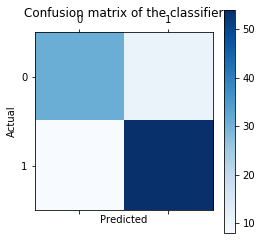

In [28]:

pl.matshow(cm, cmap=plt.cm.Blues )
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()
